# Week 6: Networks


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we are going to study how characters in the Marvel universe relate to each other using networks. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore the partnership network of the Marvel dataset

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 6.0.1**: List three different real networks and state the nodes and links for each of them.

#Answer to 6.0.1

Global shipping routes could be viewed as a network, with ports as nodes, routes as links. The same applies to aviation, as well as trucking and trains. The electrical system in a building also doubles as a network, with outlets and power stations as nodes, any wire as a link. One could also take any social network and derrive a network from it, follows/friends are routes, and accounts are nodes. 


> **Ex. 6.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Why do you care about it? 

#Answer to 6.0.2

A network that I'm curious about is the possible network that all self driving cars will be a part of. Naturally, this will be a massive network with the need to span tens of thousands of miles/kilometers with countless edges and nodes. It could be the key to eliminating road deaths in the world at large. 


> **Ex. 6.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

#Answer to 6.0.3

Given the current state of the world, the supply chain for food could see massive adjustments. Ukraine and Russia account for a large portion of the wheat grown in the world, and with Russia closing in almost all respects, including any sort of transportation, the need to find new ways to get food around the globe just got far more complicated. Already we're seeing flights that used to fly over Russia having to find new innovative solutions, whether it be creating new routes that use stopping points to avoid Russian airspace, or reviving old routes. 

> **Ex. 6.0.4**: Section 2.5 in [Network Science](http://barabasi.com/networksciencebook/) states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

#Answer to 6.0.4

The network of all followers on Twitter probably has billions of connections(people following each other), but most news outlets and celebrities don't follow people back, and there are lots of bots that also probably don't follow many people either. As a result, the number of completed connections(account A following account B and vice-versa) probably isn't very high relative to how many there could theoretically be.

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you won't know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

In [5]:
#Import all the necesssary libraries 
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:

1. add some nodes and edges.

In [16]:
#Answer to 6.1.1.1

#Create the Graph
graph = nx.Graph()

#Add nodes and edges to the graph
nodes_to_be_added = [1, 2, 3, 4, 5, 6]
graph.add_nodes_from(nodes_to_be_added)
edges_to_be_added = [(1, 2), (1, 6), (2, 3), (2, 4), (3, 5), (4, 6)]
graph.add_edges_from(edges_to_be_added)


2. print its nodes and edges.

In [17]:
#Answer to 6.1.1.2

#Prin the nodes and edges of the graph
print(list(graph.nodes))
print(list(graph.edges))

[1, 2, 3, 4, 5, 6]
[(1, 2), (1, 6), (2, 3), (2, 4), (3, 5), (4, 6)]


3. delete a node.

In [18]:
#Answer to 6.1.1.3

#Delete nodes 1 and 3
nodes_to_be_removed = [1, 3]
graph.remove_nodes_from(nodes_to_be_removed)

#Print the nodes and edges again to show the nodes have been deleted
print(list(graph.nodes))
print(list(graph.edges))

[2, 4, 5, 6]
[(2, 4), (4, 6)]


4. plot the network.

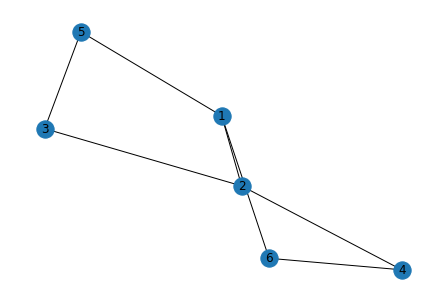

In [19]:
#Answer to 6.1.1.4

nodes_to_be_added = [1, 2, 3, 4, 5, 6]
graph.add_nodes_from(nodes_to_be_added)
edges_to_be_added = [(1, 2), (1, 6), (1, 5), (2, 3), (2, 4), (3, 5), (4, 6)]
graph.add_edges_from(edges_to_be_added)

#Plot the graph on a petersen_graph
nx.draw(graph, with_labels = True)

> **Ex. 6.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
>   * A node's *degree* is the number of other nodes it is connected to.
>   * The *degree distribution* is a histogram which shows the distribution of node degrees.

1. Describe how to create an ER network.

#Answer to 6.1.2.1

Create a netowrk with the number of nodes disired, and create a function to apply to each node how many connections to make based on the probably desired. 

2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.

In [36]:
#Answer to 6.1.2.2

#Create the ER network with 100 nodes and p=0.1
ER_network = nx.erdos_renyi_graph(100, 0.1, seed=None, directed=False)

3. Plot the network

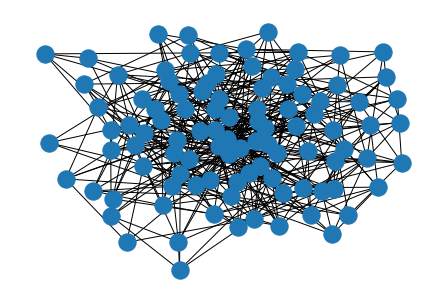

In [37]:
#Answer to 6.1.2.3
nx.draw(ER_network)

4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.

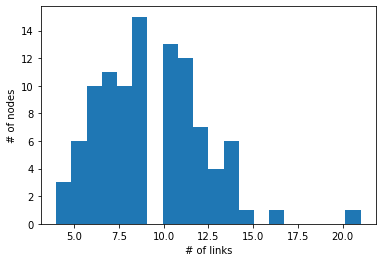

In [43]:
#Answer to 6.1.2.4

#First get the degree of each of the nodes
ER_degrees = [ER_network.degree(i) for i in ER_network.nodes()]

#Plot the distribution on a histogram
plt.hist(ER_degrees, bins = 20)
plt.xlabel("# of links")
plt.ylabel("# of nodes")
plt.show()

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.

>1. Describe what a BA network is and how to create one.

#Answer to 6.1.3.1

A BA network is one where the probability of linking to a node is proportional to said node's degree. To create at BA network, start with an inital node, and draw a number of m links to existing nodes, with the probability of linking set to be proportional to the node's degree. 

>2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.

In [39]:
#Answer to 6.1.3.2

#Create the BA network with n = 100 and m = 2
BA_network = nx.barabasi_albert_graph(n = 100, m = 2)

>3. Plot the network

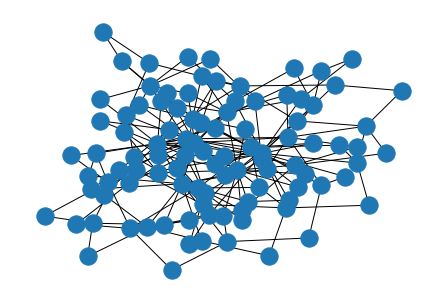

In [41]:
#Answer to 6.1.3.3

nx.draw(BA_network)

>4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.

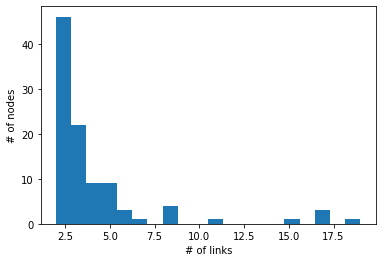

In [44]:
#Answer to 6.1.3.4

#First get the degree of each of the nodes
BA_degrees = [BA_network.degree(i) for i in BA_network.nodes()]

#Plot the distribution on a histogram
plt.hist(BA_degrees, bins = 20)
plt.xlabel("# of links")
plt.ylabel("# of nodes")
plt.show()

>5. Explain the main difference(s) you observe, when comparing to the ER network.

#Answer to 6.1.3.5

The main difference is that the ER network has more connectsions in total, due to the fact that the nodes have no effect on each other when it comes to if they have a link between them. The BA network also has a few nodes with a lot of connections, and lots of nodes with few connects, once again owing to how the nodes generate links between them. 

### Part 2: Exploring the Marvel partnership network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze our Marvel dataset. The aim of the following exercises is to analyze the network *partnerships* between characters.

> **Ex. 6.2.1 (solved)**: Write a function called `get_partners` that takes a character name, and extracts a list of their partners. Print the partnerships of Iron Man.

In [3]:
import re, os

def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("../../data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("../../data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?(?=\|.+=|\}\})", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

get_partners("Iron Man (Ultimate Marvel character)")

['Ultimate Captain America', 'Ultimate Thor', 'War Machine']

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.
**Do not** add characters that have no partners. And **do not** add links to partners of characters that are not in
your dataset.
>
> *Hint 1: You don't have to explicitly add nodes. Adding an edge will automatically add the corresponding nodes*<br>
> *Hint 2: As you know, many of the characters have a parenthesis in their name that is not important (like "Loki
(comics)"). If you remove this parenthesis your plots in the following will look much nicer. E.g. the regex code
`re.sub(" \(.+?\)", "", char)` will do the job of cleaning up a name like "Loki (comics)" for you. But then there's characters like "Captain America (William Burnside)"
where you might want to keep the parenthesis. It's not a hard requirement that you handle this in an elegant way,
just a suggestion for improving your analysis. At any rate, ARGUE for what you do, even if that's doing nothing.*

In [6]:
#Answer to 6.2.2

#Create the Graph that we'll used to visualize and analyze the partnerships
partnerships_graph = nx.Graph()

#Get a list of characters from the dataframe, initlize needed lists
char_data = pd.read_csv('../../data/data.csv')
char_names = list(char_data)
partnerships = []

#Iterate through all the character names
for ch in char_names[1:]:
    #If a character has any partners, start creating their partnerships and adding them to the main list
    if len(get_partners(ch)) != 0:
        #Add each partnerships ch has as an individual one to one partnership
        for i in range(len(get_partners(ch))):
            partnership_to_add = []
            partnership_to_add.append(ch)
            #If a character in the partners list is in the dataset, we can add the partnership
            if get_partners(ch)[i] in char_names:
                partnership_to_add.append(get_partners(ch)[i])
                partnerships.append(partnership_to_add)
    else:
        continue

#Convert lists in partnerships to tuples, add to the partnerships graph, print the nodes and links
partnerships = [tuple(i) for i in partnerships]
partnerships_graph.add_edges_from(partnerships)
print("NODES: ", len(list(partnerships_graph.nodes)))
print("LINKS: ", len(list(partnerships_graph.edges)))

#Calculate the average number of links per node, prin that as well
average_degree = sum([partnerships_graph.degree(n) for n in partnerships_graph.nodes]) / len(list(partnerships_graph.nodes))
print("The average degree of a given node is " + str(average_degree))


NODES:  109
LINKS:  78
The average degree of a given node is 1.4311926605504588


> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

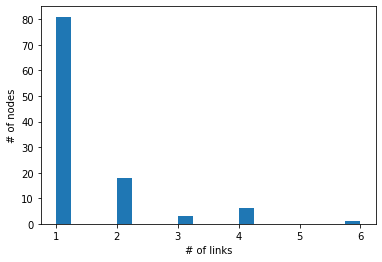

In [7]:
#Answer to 6.2.3

#First get the degree of each of the nodes
partnerships_graph_degrees = [partnerships_graph.degree(n) for n in partnerships_graph.nodes]

#Plot the distribution on a histogram
plt.hist(partnerships_graph_degrees, bins = 20)
plt.xlabel("# of links")
plt.ylabel("# of nodes")
plt.show()

This graph resembles a BA network rather than an ER network. 

> **Ex: 6.2.4**: Create a bar chart with the 10 most high-degree characters in each class (i.e., faction). Make sure that each subfigure has the same y-axis so you can compare (control with `plt.ylim` or use `plt.subplots` with parameter `sharey=True`). Comment on the result.

In [ ]:
#Answer to 6.2.4



> **Ex: 6.2.5**: Create a bar chart (similar to the one above) for each class with the characters that has the highest [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html) (BC). Again, make sure the y-axes are shared. When you comment on the result:
* Explain briefly what the BC measures (and why it may take a while to compute for bigger networks). An intuitive explanation is also great!
* Interpret, the differences you see between the charts of degree and BC.

> **Ex: 6.2.6**: Plot histograms of the [local clustering coefficient](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) (CC) for each faction and report their mean values.
* Explain briefly what the CC measures, and what it intuitively means that a node is highly clustered (CC=1) or not clustered at all (CC=0).
* Comment on the difference between classes.
>
> *Hint: You can use `plt.axvline` for drawing vertical lines on plots (e.g. if you want to show where the mean is).*

> **Ex: 6.2.7 (EXTRA - submit for extra credit)**: Let's make a nice plot of the network.
* Install the interactive networks visualization library Netwulf (go `pip install netwulf`)
* You can visualize the network using `netwulf.visualize`. But `netwulf` has all sorts of options for styling.
Specifically, `netwulf` will recognize the *node-attributes* 'group' and 'size'. These can be set on the `networkx`
graph that represents your network. Check out the [netwulf documentation Cookbook](https://netwulf.readthedocs.io/en/latest/cookbook/cookbook.html#node-and-link-attributes)
for pointers on how to make a really pretty network.
* You could for example set the 'group' attribute according to their faction. That might reveal something interesting.
>
> *Hint 1: `netwulf.visualize` opens the network in a new browser window. There, you can style your network. Once you are done,
you can pipe the image back to the notebook by hitting the "Post to Python" button.* <br>
> *Hint 2: To improve the layout toggle "Wiggle" and let the nodes wiggle around a little while until they
find good positions. You can also drag nodes. It's a good idea to untoggle "Wiggle" when you don't need
it anymore as it can be intense for your CPU.*<br>
>*Hint 3: To adjust the size of the figure of the network rendered in the notebook, again, see the Cookbook.*